In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

import sys, os
# sys.path.append('/Users/raynoldng/Projects/ieee-fraud-detection')
sys.path.append('/home/raynoldng/Desktop/ieee-fraud-detection')
from fraud.utils import load_data
from sklearn.metrics import make_scorer
import fraud.feature_engineering as fe
from fraud.lightgbm_tuning import tune 

In [3]:
test_baseline = pd.read_pickle('../input/test_baseline.pkl')
train_baseline = pd.read_pickle('../input/train_baseline.pkl')
test_y = pd.read_pickle('../input/test_y.pkl')

In [8]:
baseline_params = {
    'bagging_fraction': 0.26787134868771023,
     'feature_fraction': 0.8250219160886082,
     'learning_rate': 0.21705123187172415,
     'max_depth': 49,
     'min_child_weight': 0.0512450758603713,
     'min_data_in_leaf': 197,
     'num_leaves': 252,
     'reg_alpha': 0.4227920102405528,
     'reg_lambda': 0.7710931279863665
}

In [9]:
d_baseline_train = lgb.Dataset(train_baseline, label=test_y)
baseline_model = lgb.train(baseline_params, d_baseline_train, verbose_eval=False, num_boost_round=1000)

In [14]:
score = make_scorer(roc_auc_score)(baseline_model, train_baseline, test_y)
print("In sample score of:", score)

In sample score of: 0.99845521683


In [16]:
train_pred = baseline_model.predict(train_baseline, pred_contrib=False)

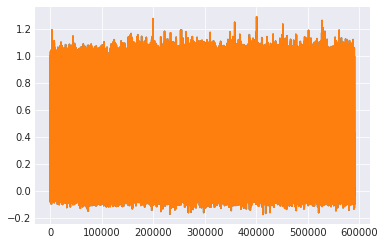

In [19]:
plt.plot(train_pred)
plt.show()

In [50]:
predict = baseline_model.predict(test_baseline)

In [51]:
predict[predict > 1] = 1
predict[predict < 0] = 0

In [52]:
sample_submission = pd.read_csv('../input/sample_submission.csv')

In [53]:
submission = pd.DataFrame({
    'TransactionID': sample_submission['TransactionID'],
    'isFraud': predict
})
submission.to_csv('submit.csv', index=False)

In [46]:
type(predict)

int

In [40]:
arr = np.array([1,2,3,4])
arr.shape

(4,)

In [41]:
arr[arr > 2] = 1

In [43]:
arr

array([1, 2, 1, 1])

In [44]:
predict.shape

(506691,)